---

_You are currently looking at **version 1.1** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the [Jupyter Notebook FAQ](https://www.coursera.org/learn/python-machine-learning/resources/bANLa) course resource._

---

# KNN simple demo

### 1. 导入数据
在本示例中将用到 [Breast Cancer Wisconsin (Diagnostic) Database](http://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)) 数据集来训练一个分类器，用于病人的诊断. 因此先导入数据集，并看一下数据集的描述.

In [18]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

print(cancer.DESCR) # 打印数据集的描述
cancer.keys()       # 数据集关键字

Breast Cancer Wisconsin (Diagnostic) Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.

        

dict_keys(['feature_names', 'target_names', 'DESCR', 'data', 'target'])

### 2. 特征数量

乳腺癌数据集有多少个特征? 下面的函数返回一个整数值

In [19]:

def answer_zero():
    return len(cancer['feature_names'])

answer_zero() #调用

30

### 3. 数据集转换成 DataFrame

Scikit-learn 通常和 lists, numpy arrays, scipy-sparse matrices 以及 pandas DataFrames 一起使用，下面就用 pandas 将数据集转换成 DataFrame，这样对数据各种操作更方便. 

*下面的函数返回一个 `(569, 31)` 的 DataFrame ，并且 columns 和 index 分别为 * 

*columns = *

    ['mean radius', 'mean texture', 'mean perimeter', 'mean area',
    'mean smoothness', 'mean compactness', 'mean concavity',
    'mean concave points', 'mean symmetry', 'mean fractal dimension',
    'radius error', 'texture error', 'perimeter error', 'area error',
    'smoothness error', 'compactness error', 'concavity error',
    'concave points error', 'symmetry error', 'fractal dimension error',
    'worst radius', 'worst texture', 'worst perimeter', 'worst area',
    'worst smoothness', 'worst compactness', 'worst concavity',
    'worst concave points', 'worst symmetry', 'worst fractal dimension',
    'target']

*and index = *

    RangeIndex(start=0, stop=569, step=1)

In [4]:
def answer_one():
    
    df = pd.DataFrame( data = cancer['data'], index=range(0,569), columns=  ['mean radius', 'mean texture', 'mean perimeter', 'mean area',
'mean smoothness', 'mean compactness', 'mean concavity',
'mean concave points', 'mean symmetry', 'mean fractal dimension',
'radius error', 'texture error', 'perimeter error', 'area error',
'smoothness error', 'compactness error', 'concavity error',
'concave points error', 'symmetry error', 'fractal dimension error',
'worst radius', 'worst texture', 'worst perimeter', 'worst area',
'worst smoothness', 'worst compactness', 'worst concavity',
'worst concave points', 'worst symmetry', 'worst fractal dimension'])
    df['target'] = cancer['target']

    
    return df

answer_one()

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0         17.990         10.38          122.80     1001.0          0.11840   
1         20.570         17.77          132.90     1326.0          0.08474   
2         19.690         21.25          130.00     1203.0          0.10960   
3         11.420         20.38           77.58      386.1          0.14250   
4         20.290         14.34          135.10     1297.0          0.10030   
5         12.450         15.70           82.57      477.1          0.12780   
6         18.250         19.98          119.60     1040.0          0.09463   
7         13.710         20.83           90.20      577.9          0.11890   
8         13.000         21.82           87.50      519.8          0.12730   
9         12.460         24.04           83.97      475.9          0.11860   
10        16.020         23.24          102.70      797.8          0.08206   
11        15.780         17.89          103.60      781.0          0.09710   
12        19.170         24.80          132.40     1123.0          0.09740   
13        15.850         23.95          103.70      782.7          0.08401   
14        13.730         22.61           93.60      578.3          0.11310   
15        14.540         27.54           96.73      658.8          0.11390   
16        14.680         20.13           94.74      684.5          0.09867   
17        16.130         20.68          108.10      798.8          0.11700   
18        19.810         22.15          130.00     1260.0          0.09831   
19        13.540         14.36           87.46      566.3          0.09779   
20        13.080         15.71           85.63      520.0          0.10750   
21         9.504         12.44           60.34      273.9          0.10240   
22        15.340         14.26          102.50      704.4          0.10730   
23        21.160         23.04          137.20     1404.0          0.09428   
24        16.650         21.38          110.00      904.6          0.11210   
25        17.140         16.40          116.00      912.7          0.11860   
26        14.580         21.53           97.41      644.8          0.10540   
27        18.610         20.25          122.10     1094.0          0.09440   
28        15.300         25.27          102.40      732.4          0.10820   
29        17.570         15.05          115.00      955.1          0.09847   
..           ...           ...             ...        ...              ...   
539        7.691         25.44           48.34      170.4          0.08668   
540       11.540         14.44           74.65      402.9          0.09984   
541       14.470         24.99           95.81      656.4          0.08837   
542       14.740         25.42           94.70      668.6          0.08275   
543       13.210         28.06           84.88      538.4          0.08671   
544       13.870         20.70           89.77      584.8          0.09578   
545       13.620         23.23           87.19      573.2          0.09246   
546       10.320         16.35           65.31      324.9          0.09434   
547       10.260         16.58           65.85      320.8          0.08877   
548        9.683         19.34           61.05      285.7          0.08491   
549       10.820         24.21           68.89      361.6          0.08192   
550       10.860         21.48           68.51      360.5          0.07431   
551       11.130         22.44           71.49      378.4          0.09566   
552       12.770         29.43           81.35      507.9          0.08276   
553        9.333         21.94           59.01      264.0          0.09240   
554       12.880         28.92           82.50      514.3          0.08123   
555       10.290         27.61           65.67      321.4          0.09030   
556       10.160         19.59           64.73      311.7          0.10030   
557        9.423         27.88           59.26      271.3          0.08123   
558       14.590         22

### 4. 类别分布
数据集样本的类别的分布是怎样呢? ，例如有多少样本是 `malignant`(恶性) (编码为 0)，有多少样本是`benign`(良性) (编码为 1)?

*下面的函数返回 恶性 和 良性 两个类别各样本数 index =* `['malignant', 'benign']`

In [5]:
def answer_two():
    cancerdf = answer_one()
    
    yes = np.sum([cancerdf['target'] > 0])
    no = np.sum([cancerdf['target'] < 1])
    
    data = np.array([no, yes])
    s = pd.Series(data,index=['malignant','benign'])
    
    return s

answer_two()

malignant    212
benign       357
dtype: int32

### 5. 数据准备1
将上面的 DataFrame 分为 `X` (data，特征) and `y` (label，标签).

*下面函数返回:* `(X, y)`*, * 
* `X` *has shape* `(569, 30)` 30个特征
* `y` *has shape* `(569,)`.

In [20]:
from sklearn.model_selection import train_test_split
def answer_three():
    cancerdf = answer_one()
    
    X = cancerdf[  ['mean radius', 'mean texture', 'mean perimeter', 'mean area',
'mean smoothness', 'mean compactness', 'mean concavity',
'mean concave points', 'mean symmetry', 'mean fractal dimension',
'radius error', 'texture error', 'perimeter error', 'area error',
'smoothness error', 'compactness error', 'concavity error',
'concave points error', 'symmetry error', 'fractal dimension error',
'worst radius', 'worst texture', 'worst perimeter', 'worst area',
'worst smoothness', 'worst compactness', 'worst concavity',
'worst concave points', 'worst symmetry', 'worst fractal dimension'] ]
    y = cancerdf['target']
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
    return X, y

### 6. 数据准备2
利用 `train_test_split`, 将 `X`，`y` 分别分到训练集和测试集 `(X_train, X_test, y_train, and y_test)`.

**设置随机数为 0，`random_state=0` **

*下面函数返回；* `(X_train, X_test, y_train, y_test)`
* `X_train` *has shape* `(426, 30)`
* `X_test` *has shape* `(143, 30)`
* `y_train` *has shape* `(426,)`
* `y_test` *has shape* `(143,)`

In [7]:
from sklearn.model_selection import train_test_split

def answer_four():
    X, y = answer_three()
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
    print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
    
    return X_train, X_test, y_train, y_test

### 7. sklearn 中的 KNN 分类器
利用 KNeighborsClassifier, 以及训练集 `X_train`, `y_train` 来训练模型，并设置 `n_neighbors = 1`.


In [21]:
from sklearn.neighbors import KNeighborsClassifier

def answer_five():
    X_train, X_test, y_train, y_test = answer_four()
    
    knn = KNeighborsClassifier(n_neighbors = 1)
    knn.fit(X_train, y_train)
    
    return knn

### 8. 模型预测
利用 KNN 分类模型，以及每个的特征的均值来预测样本.

`cancerdf.mean()[:-1].values.reshape(1, -1)` 可以获得每个特征的均值, 忽略 target, 并 reshapes 数据从 1D 到 2D.

*下面的函数返回一个数组 `array([ 0.])` or `array([ 1.])`*

In [22]:
from sklearn.neighbors import KNeighborsClassifier
def answer_six():
    cancerdf = answer_one()
    means = cancerdf.mean()[:-1].values.reshape(1, -1)
    A = answer_five()
    prediction = A.predict(means)

    return prediction

answer_six()

(426, 30) (143, 30) (426,) (143,)


array([1])

### 9. 测试集预测
利用上面的 KNN 模型预测数据 `X_test`的类别 y.

*下面函数返回一个大小为 `(143,)` 的数组，并且值是 `0.0` or `1.0`.*

In [10]:
def answer_seven():
    cancerdf = answer_one()
    X_train, X_test, y_train, y_test = answer_four()
    knn = answer_five()
    prediction =  knn.predict(X_test)
    
    return prediction

answer_seven()

(426, 30) (143, 30) (426,) (143,)
(426, 30) (143, 30) (426,) (143,)


array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 0])

### 10. 模型分数
现在利用 `X_test` 和 `y_test`来看看模型能得多少分（平均准确度），原本的测试集就有label标签，而利用 KNN 同样可以对测试集预测得到另一组标签，从而计算出模型的平均准确度.

*下面函数返回一个小数，0-1*

In [11]:
def answer_eight():
    X_train, X_test, y_train, y_test = answer_four()
    knn = answer_five()
    score = (knn.score(X_test, y_test))
    
    return score

answer_eight()

(426, 30) (143, 30) (426,) (143,)
(426, 30) (143, 30) (426,) (143,)


0.91608391608391604

### 11. plot

同样可以看一下在模型的作用下，训练集 和 测试集中恶性样本和良性样本分别的准确度，训练集上都是 100％，而在测试集上，良性样本的准确度略高.

In [23]:
def accuracy_plot():
    import matplotlib.pyplot as plt

    %matplotlib notebook

    X_train, X_test, y_train, y_test = answer_four()

    # Find the training and testing accuracies by target value (i.e. malignant, benign)
    mal_train_X = X_train[y_train==0]
    mal_train_y = y_train[y_train==0]
    ben_train_X = X_train[y_train==1]
    ben_train_y = y_train[y_train==1]

    mal_test_X = X_test[y_test==0]
    mal_test_y = y_test[y_test==0]
    ben_test_X = X_test[y_test==1]
    ben_test_y = y_test[y_test==1]

    knn = answer_five()

    scores = [knn.score(mal_train_X, mal_train_y), knn.score(ben_train_X, ben_train_y), 
              knn.score(mal_test_X, mal_test_y), knn.score(ben_test_X, ben_test_y)]


    plt.figure()

    # Plot the scores as a bar chart
    bars = plt.bar(np.arange(4), scores, color=['#4c72b0','#4c72b0','#55a868','#55a868'])

    # directly label the score onto the bars
    for bar in bars:
        height = bar.get_height()
        plt.gca().text(bar.get_x() + bar.get_width()/2, height*.90, '{0:.{1}f}'.format(height, 2), 
                     ha='center', color='w', fontsize=11)

    # remove all the ticks (both axes), and tick labels on the Y axis
    plt.tick_params(top='off', bottom='off', left='off', right='off', labelleft='off', labelbottom='on')

    # remove the frame of the chart
    for spine in plt.gca().spines.values():
        spine.set_visible(False)

    plt.xticks([0,1,2,3], ['Malignant\nTraining', 'Benign\nTraining', 'Malignant\nTest', 'Benign\nTest'], alpha=0.8);
    plt.title('Training and Test Accuracies for Malignant and Benign Cells', alpha=0.8)

(426, 30) (143, 30) (426,) (143,)
(426, 30) (143, 30) (426,) (143,)


<IPython.core.display.Javascript object>


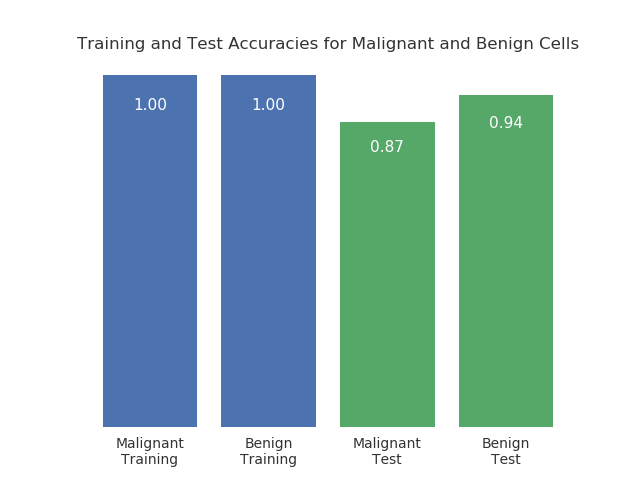

In [24]:
# Uncomment the plotting function to see the visualization, 
# Comment out the plotting function when submitting your notebook for grading

accuracy_plot()